In this notebook you will learn how to create and use a neural network to classify articles of clothing. To achieve this, we will use a sub module of TensorFlow called keras.


In [72]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

**Dataset**

For this we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [73]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_lables)=fashion_mnist.load_data()

Let's have a look at this data to see what we are working with.

In [74]:
train_images.shape

(60000, 28, 28)

So we've got 60,000 images that are made up of 28x28 pixels (784 in total).

In [75]:
test_images.shape

(10000, 28, 28)

So we've got 10,000 images that are made up of 28x28 pixels (784 in total).

In [76]:
train_lables.shape

(60000,)

In [77]:
test_images.shape

(10000, 28, 28)

In [78]:
train_images[0,23,23]  # let's have a look at one pixel

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [79]:
train_lables[:10]   # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [80]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Fianlly let's look at what some of these images look like...

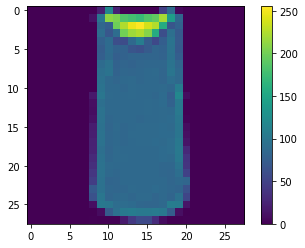

In [81]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

**Data Preprocessing**

The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [82]:
train_images = train_images / 255.0

test_images = test_images / 255.0

**Building the Model**

In [83]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)), #first layer
                        keras.layers.Dense(128,activation='relu'),  #second layer
                        keras.layers.Dense(10,activation='softmax')  #third layer
                        ])

**Layer 1**: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2**: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3**: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

**Compile the Model**

The last step in building the model is to define the loss function, optimizer and metrics we would like to track.

In [84]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4987 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3766 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3345 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3111 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2920 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2778 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2658 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2551 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2465 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237

**Evaluating the Model**

In [86]:
test_loss,test_acc=model.evaluate(test_images,test_lables,verbose='1')
print("accuracy:",test_acc)

accuracy: 0.8675000071525574


**Making Predictions**

To make predictions we simply need to pass an array of data in the form we've specified in the input layer to .predict() method.

In [87]:
predictions=model.predict(test_images)


This method returns to us an array of predictions for each image we passed it. Let's have a look at the predictions for image 1.

In [88]:
predictions[0]

array([2.0913000e-10, 3.1409986e-11, 1.0540547e-08, 7.8466478e-09,
       9.0854706e-11, 6.0491048e-04, 1.1838805e-09, 8.4273061e-03,
       6.0779882e-08, 9.9096769e-01], dtype=float32)

In [89]:
np.argmax(predictions[0])

9

And we can check if this is correct by looking at the value of the cooresponding test label.

In [90]:
test_lables[0]

9

**Verifying Predictions**

Pick a number: 1


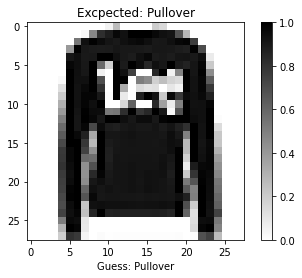

In [98]:
COLOR='while'

def predict(model,image,correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction=model.predict(np.array([image]))
  predicted_class=class_names[np.argmax(prediction)]


  show_image(image,class_names[correct_label],predicted_class)



def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_lables[num]
predict(model, image, label)